In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s


#先要在终端下载这个包，然后用上面的代码import，就可以直接使用数据了，不需要下载数据
pip install ucimlrepo

In [1]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# 获取数据
bank_marketing = fetch_ucirepo(id=222)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# 合并特征和目标变量
df = pd.concat([X, y], axis=1)

# 查看前几行
print("前5行数据：")
print(df.head())

# 检查数据类型和缺失值
print("\n数据信息：")
print(df.info())

# 目标变量分布
print("\n目标变量'y'的分布：")
print(df['y'].value_counts(normalize=True))

前5行数据：
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome   y  
0     NaN            5   may       261         1     -1         0      NaN  no  
1     NaN            5   may       151         1     -1         0      NaN  no  
2     NaN            5   may        76         1     -1         0      NaN  no  
3     NaN            5   may        92         1     -1         0      NaN  no  
4     NaN            5   may       198         1     -1         0      NaN  no  

数据信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211

In [2]:
# 数值特征的统计
print("\n数值特征的描述性统计：")
print(df.describe())

# 类别特征的统计
print("\n类别特征的描述性统计：")
print(df.describe(include='object'))


数值特征的描述性统计：
                age        balance   day_of_week      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.0

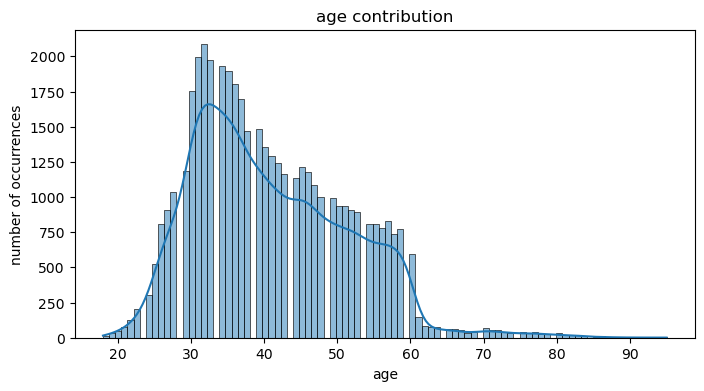

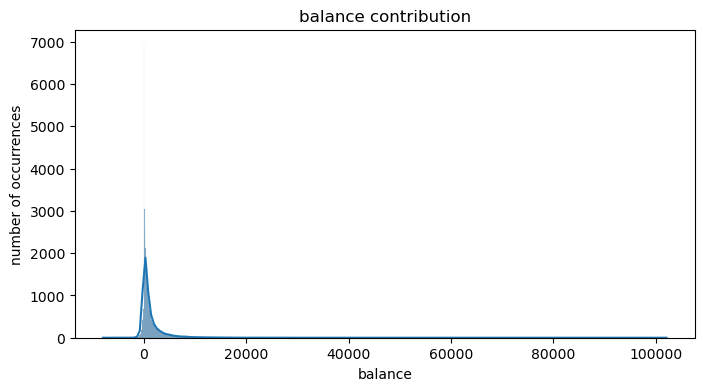

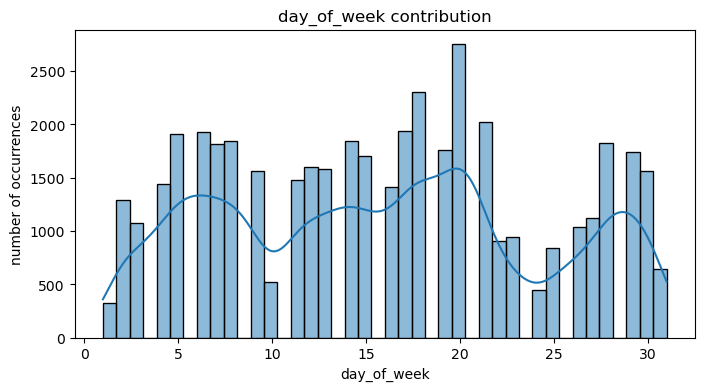

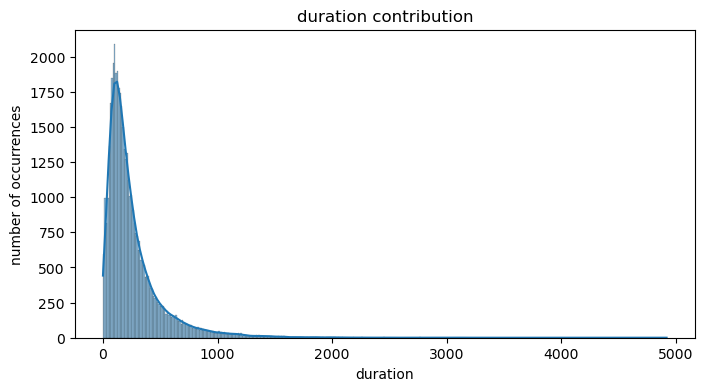

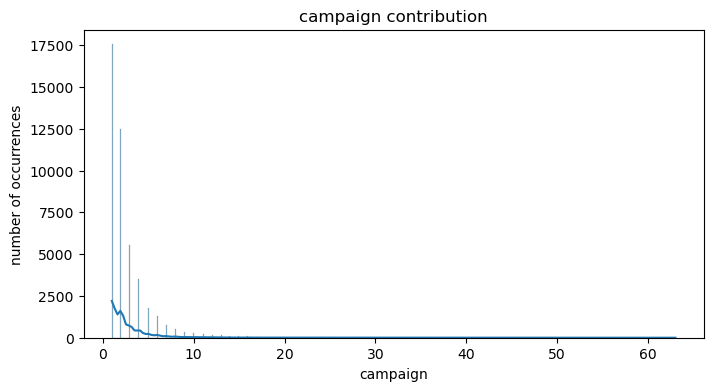

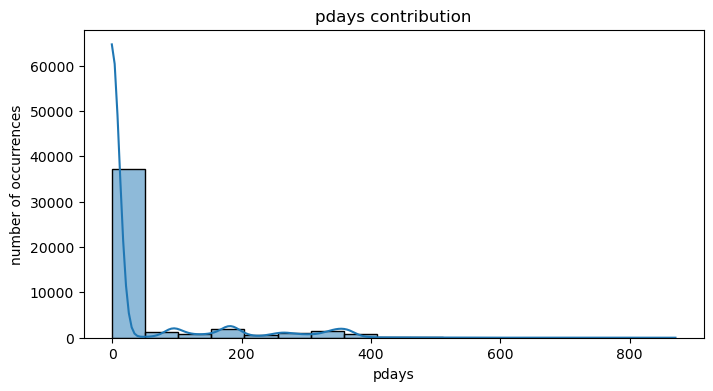

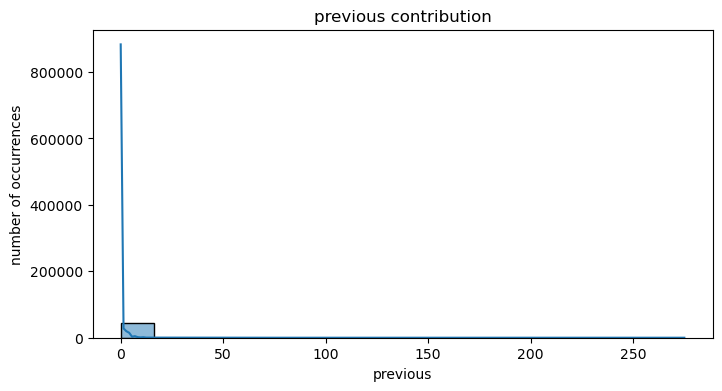

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 数值特征列表
numerical_cols = ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']

# 绘制直方图
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)  # kde=True 添加密度曲线
    plt.title(f'{col} contribution')
    plt.xlabel(col)
    plt.ylabel('number of occurrences')
    plt.show()

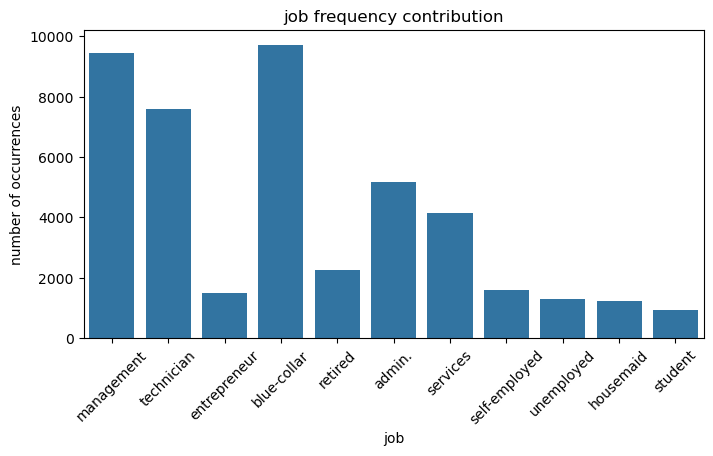

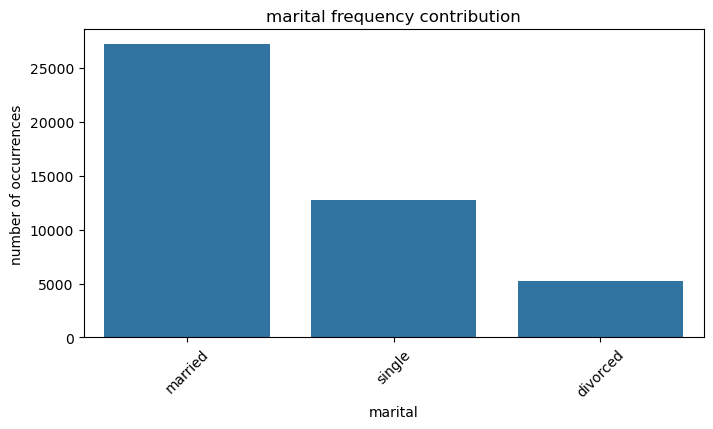

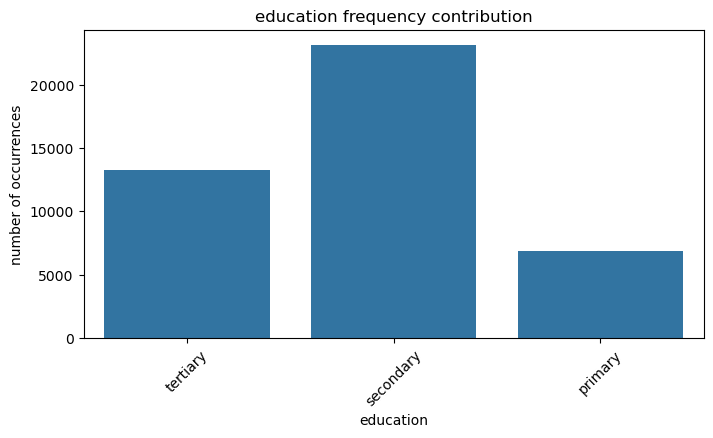

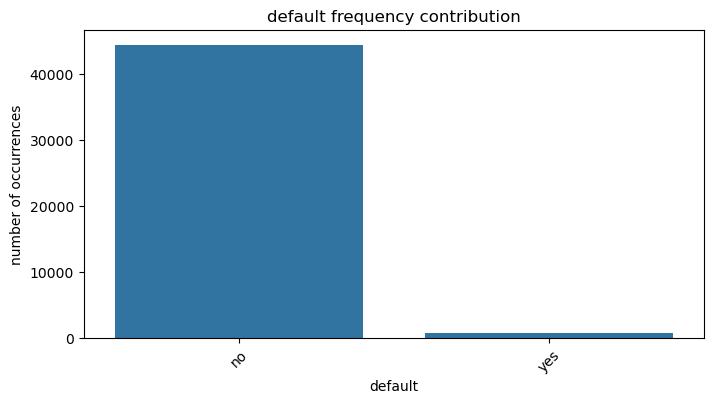

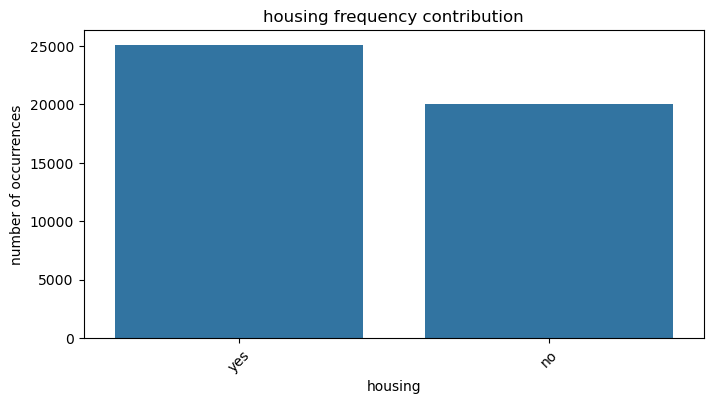

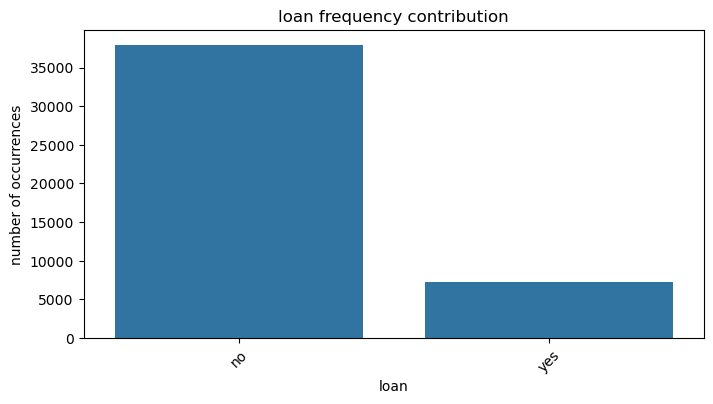

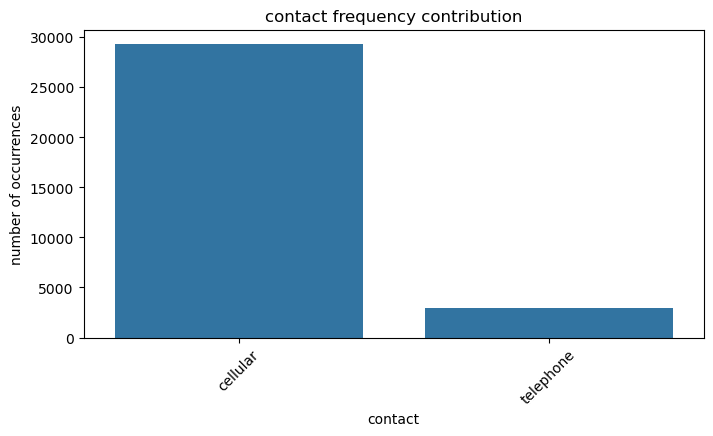

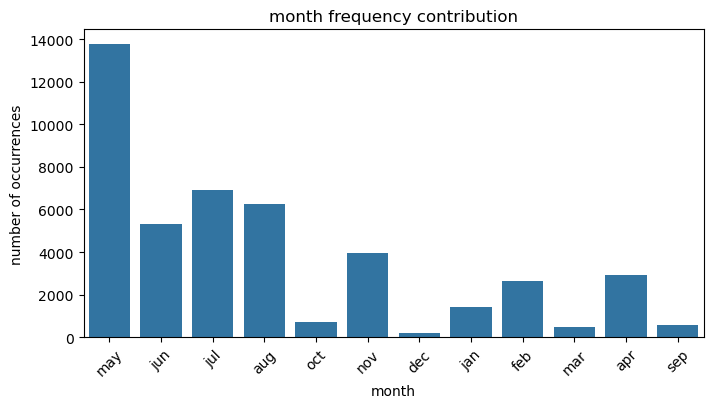

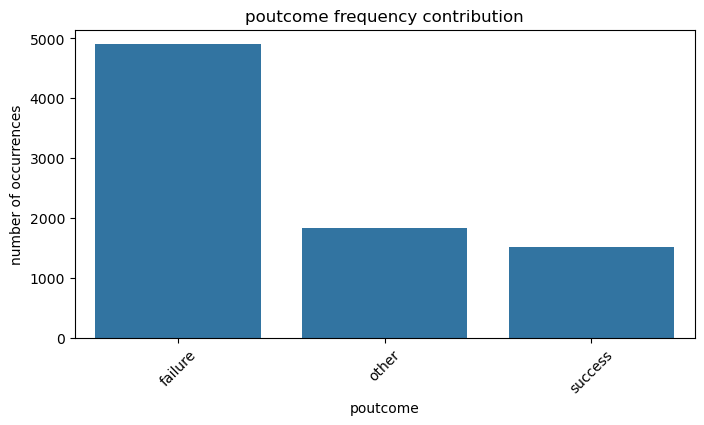

In [5]:
# 类别特征列表
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# 绘制条形图
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'{col} frequency contribution')
    plt.xlabel(col)
    plt.ylabel('number of occurrences')
    plt.xticks(rotation=45)
    plt.show()

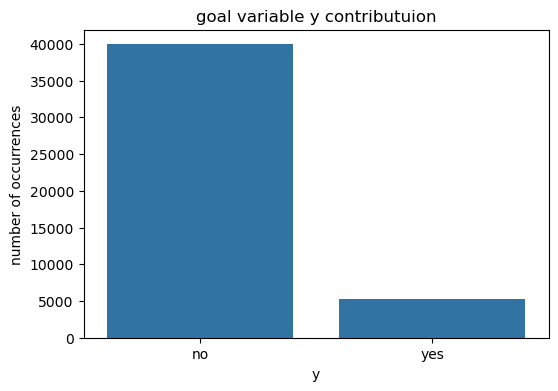

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.title('goal variable y contributuion')
plt.xlabel('y')
plt.ylabel('number of occurrences')
plt.show()

建模的时候由于 yes 和no 的比例差别过大，所以需要考虑采样或者加权（这个在后面建模的时候要记住）

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(b

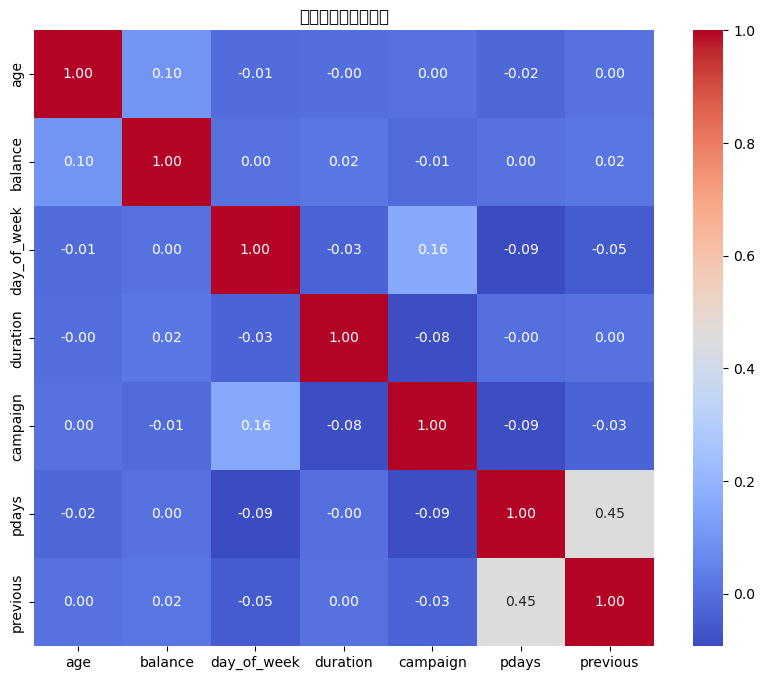

In [8]:
# 计算相关矩阵
corr_matrix = df[numerical_cols].corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('数值特征的相关矩阵')
plt.show()

In [9]:
# 使用交叉表分析
for col in categorical_cols:
    cross_tab = pd.crosstab(df[col], df['y'], normalize='index')  # 按行归一化
    print(f"\n{col} 与 y 的交叉表：")
    print(cross_tab)


job 与 y 的交叉表：
y                    no       yes
job                              
admin.         0.877973  0.122027
blue-collar    0.927250  0.072750
entrepreneur   0.917283  0.082717
housemaid      0.912097  0.087903
management     0.862444  0.137556
retired        0.772085  0.227915
self-employed  0.881571  0.118429
services       0.911170  0.088830
student        0.713220  0.286780
technician     0.889430  0.110570
unemployed     0.844973  0.155027

marital 与 y 的交叉表：
y               no       yes
marital                     
divorced  0.880545  0.119455
married   0.898765  0.101235
single    0.850508  0.149492

education 与 y 的交叉表：
y                no       yes
education                    
primary    0.913735  0.086265
secondary  0.894406  0.105594
tertiary   0.849936  0.150064

default 与 y 的交叉表：
y              no       yes
default                    
no       0.882039  0.117961
yes      0.936196  0.063804

housing 与 y 的交叉表：
y              no       yes
housing                    
no

总结与洞见
通过以上EDA，你将获得以下关键发现：

特征分布：
数值特征如balance和duration偏斜，可能需要对数变换或异常值处理。
类别特征中“unknown”值需特别处理（如education、poutcome）。
类不平衡：
目标变量“y”中“yes”仅占11.5%，建议在建模时使用过采样（如SMOTE）或调整类别权重。
相关性：
pdays和previous高度相关，可能只需保留一个特征。
duration可能是强预测因子，但需谨慎使用（可能受未来信息影响）。
类别关系：
某些职业（如“management”）、月份（如“oct”）和之前活动结果（“success”）与订阅率正相关。